performing eda for: data\data\drugbank\data.npy
       0         1         2         3        4         5         6     \
0 -0.004888 -0.052042 -0.095398  0.018635 -0.13071 -0.037728 -0.006192   
1 -0.004888 -0.052042 -0.095398  0.018635 -0.13071 -0.037728 -0.006192   
2 -0.004888 -0.052042 -0.095398  0.018635 -0.13071 -0.037728 -0.006192   
3 -0.004888 -0.052042 -0.095398  0.018635 -0.13071 -0.037728 -0.006192   
4 -0.004888 -0.052042 -0.095398  0.018635 -0.13071 -0.037728 -0.006192   

       7         8         9     ...      1091      1092      1093      1094  \
0 -0.021046  0.033328 -0.006929  ...  0.025214 -0.074265 -0.105200  0.058259   
1 -0.021046  0.033328 -0.006929  ... -0.100490  0.019889 -0.015308 -0.000830   
2 -0.021046  0.033328 -0.006929  ... -0.119040  0.052047  0.261990 -0.024173   
3 -0.021046  0.033328 -0.006929  ... -0.023187 -0.156400  0.042572  0.080909   
4 -0.021046  0.033328 -0.006929  ... -0.111190 -0.015720  0.009145  0.186230   

       1095      1096     

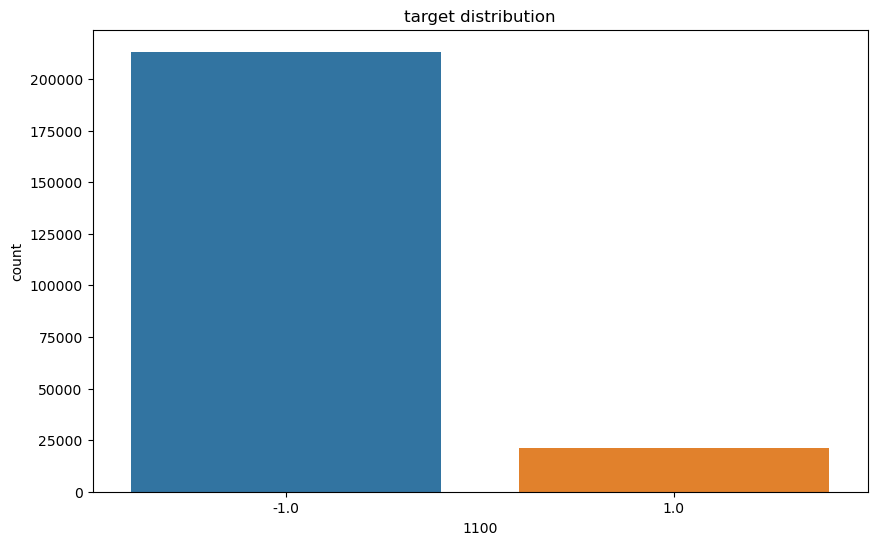

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    
    for datafile in drugs:
        print("performing eda for:", datafile)
        data = np.load(datafile)
        perform_eda(data)

def perform_eda(data):
    df = pd.DataFrame(data)
    
    print(df.head())  
    print(df.info())  
    print(df.describe())
    print("missing vals:\n", df.isnull().sum())
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df.iloc[:, -1])
    plt.title('target distribution')
    plt.show()
    
    sns.pairplot(df)
    plt.show()
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('correlation heatman')
    plt.show()

main()


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

results = []

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)

        dt = DecisionTreeClassifier()
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(dt, pcax, y, cv=kfold, scoring='roc_auc')
        innerresult.append(np.mean(scores))
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

results = []

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)

        knn = KNeighborsClassifier()
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(knn, pcax, y, cv=kfold, scoring='roc_auc')
        innerresult.append(np.mean(scores))
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

results = []

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)

        nb = GaussianNB()
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(nb, pcax, y, cv=kfold, scoring='roc_auc')
        innerresult.append(np.mean(scores))
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA

results = []

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)

        lr = LinearRegression()
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(lr, pcax, y, cv=kfold, scoring='neg_mean_squared_error')
        innerresult.append(-np.mean(scores))  # Negative sign for mean squared error
       
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

results = []

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)

        lr = LogisticRegression()
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(lr, pcax, y, cv=kfold, scoring='roc_auc')
        innerresult.append(np.mean(scores))
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

results = []

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)

        rf = RandomForestClassifier()
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(rf, pcax, y, cv=kfold, scoring='roc_auc')
        innerresult.append(np.mean(scores))
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score

results = []

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    
    for x in range(len(drugs)-4):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    svd = TruncatedSVD(n_components=50) 
    x_svd = svd.fit_transform(x)
    for xx in range(10):
        svm = SVC(probability=True)  
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(svm, x_svd, y, cv=kfold, scoring='roc_auc')
        innerresult.append(np.mean(scores))
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

results = []

def main():
    pdx = "data\\data\\pdx\\data.npy"
    gdsc = "data\\data\\gdsc\\data.npy"
    ccle = "data\\data\\ccle\\data.npy"
    drugs = [pdx, gdsc, ccle]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean squared error and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)

        dt = DecisionTreeRegressor()  
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(dt, pcax, y, cv=kfold, scoring='neg_mean_squared_error')
        innerresult.append(-np.mean(scores))  
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

results = []

def main():
    pdx = "data\\data\\pdx\\data.npy"
    gdsc = "data\\data\\gdsc\\data.npy"
    ccle = "data\\data\\ccle\\data.npy"
    drugs = [pdx, gdsc, ccle]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean squared error and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)

        rf = RandomForestRegressor() 
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(rf, pcax, y, cv=kfold, scoring='neg_mean_squared_error')
        innerresult.append(-np.mean(scores)) 
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    results.append(meanstd)

main()


In [ ]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

results = []

def main():
    pdx = "data\\data\\pdx\\data.npy"
    gdsc = "data\\data\\gdsc\\data.npy"
    ccle = "data\\data\\ccle\\data.npy"
    drugs = [pdx, gdsc, ccle]
    
    for x in range(len(drugs)):
        print(x)
        stuff(drugs[x])
    
    for x in range(len(drugs)):
        print(drugs[x], "mean squared error and standard deviation is:", results[x])

def stuff(datafile):
    innerresult = []
    data = np.load(datafile)
    x = data[:, :-1]
    y = data[:, -1] 
    for xx in range(10):
        pca = PCA(3)
        pcax = pca.fit_transform(x)
        svm = SVR()  
        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(svm, pcax, y, cv=kfold, scoring='neg_mean_squared_error')
        innerresult.append(-np.mean(scores)) 
        
    meanstd = (np.mean(innerresult), np.std(innerresult))
    print(meanstd)
    results.append(meanstd)

main()


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score


def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    performancegains = np.zeros((len(drugs), len(drugs)))
    
    for x, trainingdataset in enumerate(drugs):
        trainingdata = np.load(trainingdataset)
        xtrain = trainingdata[:, :-1]
        ytrain = trainingdata[:, -1]
        print('Now doing ' + trainingdataset)
        for xx, testingdataset in enumerate(drugs):
            if x != xx: 
                print('on ' + testingdataset)
                testingdata = np.load(testingdataset)
                xtest = testingdata[:, :-1]  
                ytest = testingdata[:, -1]
                performance = stuff(xtrain, ytrain, xtest, ytest)
                performancegains[x, xx] = performance
    
    print("Performance Gain Matrix:")
    print(performancegains)
                
def stuff(xtrain, ytrain, xtest, ytest):
    svd_train = TruncatedSVD(n_components=min(xtrain.shape[1], 3))
    xtrain_svd = svd_train.fit_transform(xtrain)
    svd_test = TruncatedSVD(n_components=min(xtest.shape[1], 3))
    xtest_svd = svd_test.fit_transform(xtest)
    print('SVD finished')
    nb = GaussianNB()
    nb.fit(xtrain_svd, ytrain)
    print('NB finished')

    ypred = nb.predict(xtest_svd)
    auc = roc_auc_score(ytest, ypred)
    print(auc)
    return auc


main()


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    performancegains = np.zeros((len(drugs), len(drugs)))
    
    for x, trainingdataset in enumerate(drugs):
        trainingdata = np.load(trainingdataset)
        xtrain = trainingdata[:, :-1]
        ytrain = trainingdata[:, -1]
        print('Now doing ' + trainingdataset)
        for xx, testingdataset in enumerate(drugs):
            if x != xx: 
                print('on ' + testingdataset)
                testingdata = np.load(testingdataset)
                xtest = testingdata[:, :-1]  
                ytest = testingdata[:, -1]
                performance = stuff(xtrain, ytrain, xtest, ytest)
                performancegains[x, xx] = performance
    
    print("Performance Gain Matrix:")
    print(performancegains)
                
def stuff(xtrain, ytrain, xtest, ytest):
    svd_train = TruncatedSVD(n_components=min(xtrain.shape[1], 3))
    xtrain_svd = svd_train.fit_transform(xtrain)
    svd_test = TruncatedSVD(n_components=min(xtest.shape[1], 3))
    xtest_svd = svd_test.fit_transform(xtest)
    print('SVD finished')
    knn = KNeighborsClassifier()
    knn.fit(xtrain_svd, ytrain)
    print('KNN finished')
    
    ypred = knn.predict(xtest_svd)
    auc = roc_auc_score(ytest, ypred)
    print(auc)
    return auc

main()


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score

def main():
    drugbank = "data\\data\\drugbank\\data.npy"
    offside = "data\\data\\offside\\data.npy"
    stitch = "data\\data\\stitch\\data_900.npy"
    repur = "data\\data\\repurposing_hub\\data.npy"
    sider = "data\\data\\sider\\data.npy"
    drugs = [drugbank, offside, stitch, repur, sider]
    performancegains = np.zeros((len(drugs), len(drugs)))
    
    for x, trainingdataset in enumerate(drugs):
        trainingdata = np.load(trainingdataset)
        xtrain = trainingdata[:, :-1]
        ytrain = trainingdata[:, -1]
        print('Now doing ' + trainingdataset)
        for xx, testingdataset in enumerate(drugs):
            if x != xx: 
                print('on ' + testingdataset)
                testingdata = np.load(testingdataset)
                xtest = testingdata[:, :-1]  
                ytest = testingdata[:, -1]
                performance = stuff(xtrain, ytrain, xtest, ytest)
                performancegains[x, xx] = performance
    
    print("Performance Gain Matrix:")
    print(performancegains)
                
def stuff(xtrain, ytrain, xtest, ytest):
    svd_train = TruncatedSVD(n_components=min(xtrain.shape[1], 3))
    xtrain_svd = svd_train.fit_transform(xtrain)
    svd_test = TruncatedSVD(n_components=min(xtest.shape[1], 3))
    xtest_svd = svd_test.fit_transform(xtest)
    print('SVD finished')
    dt = DecisionTreeClassifier()
    dt.fit(xtrain_svd, ytrain)
    print('Decision Tree finished')
    
    ypred = dt.predict(xtest_svd)
    auc = roc_auc_score(ytest, ypred)
    print(auc)
    return auc

main()


In [ ]:
"""


IF YOU RUN INTO A MEMORY ISSUE THEN RUN EACH FUNCTION ONE RUN AT A TIME. COMMENT OUT FUNCTIONS THAT YOU CANNOT RUN UNTIL THE NEXT ONE




"""
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import roc_auc_score, mean_squared_error

def main():
    drugbank = "data\\data\\drugbank\\data.npy"  # dataset that has labels used for classification
    offside = "data\\data\\offside\\data.npy"  # dataset that has labels used for classification
    stitch = "data\\data\\stitch\\data_900.npy"  # dataset that has labels used for classification
    repur = "data\\data\\repurposing_hub\\data.npy"  # dataset that has labels used for classification
    sider = "data\\data\\sider\\data.npy"  # dataset that has labels used for classification
    ccle = "data\\data\\ccle\\data.npy"  # dataset that has no labels used for regression
    gdsc = "data\\data\\gdsc\\data.npy"  # dataset that has no labels used for regression
    pdx = "data\\data\\pdx\\data.npy"  # dataset that has no labels used for regression
    
    classify_datasets = [drugbank, offside, stitch, repur, sider]
    reg_datasets = [ccle, gdsc, pdx]
    
    performance_matrix = np.zeros((8, 8))
    #performance_matrix = classonclass(classify_datasets, performance_matrix)#COMMENT OUT IF YOU WANT
    #performance_matrix = regonclass(reg_datasets, classify_datasets, performance_matrix)#COMMENT OUT IF YOU WANT
    #performance_matrix = classonreg(classify_datasets, reg_datasets, performance_matrix)#COMMENT OUT IF YOU WANT
    #regonreg(reg_datasets, performance_matrix)#COMMENT OUT IF YOU WANT
    
    print("Performance Gain Matrix:")
    print(performance_matrix)

def classonclass(classify_datasets, performance_matrix):
    for i, ctraindataset in enumerate(classify_datasets):
        for j, ctestdataset in enumerate(classify_datasets):
            if i != j:
                ctraindata = np.load(ctraindataset)
                ctestdata = np.load(ctestdataset)
                
                cxtrain = ctraindata[:, :-1]
                cytrain = ctraindata[:, -1]
                
                cxtest = ctestdata[:, :-1]
                cytest = ctestdata[:, -1]
                
                print('Now doing classification on classification:', ctraindataset, 'and', ctestdataset)
                performance_matrix[0, j] = stuff(cxtrain, cytrain, cxtest, cytest)
    
    return performance_matrix

def regonclass(reg_datasets, classify_datasets, performance_matrix):
    for i, rdataset in enumerate(reg_datasets):
        for j, ctestdataset in enumerate(classify_datasets):
            rtraindata = np.load(rdataset)
            ctestdata = np.load(ctestdataset)
            
            rxtrain = rtraindata[:, :-1]
            rytrain = rtraindata[:, -1]
            
            cxtest = ctestdata[:, :-1]
            cytest = ctestdata[:, -1]
            
            print('Now doing regression on classification:', rdataset, 'and', ctestdataset)
            performance_matrix[1, j] = stuff(rxtrain, rytrain, cxtest, cytest)
    
    return performance_matrix

def classonreg(classify_datasets, reg_datasets, performance_matrix):
    for i, ctraindataset in enumerate(classify_datasets):
        for j, rdataset in enumerate(reg_datasets):
            ctraindata = np.load(ctraindataset)
            rtestdata = np.load(rdataset)
            
            cxtrain = ctraindata[:, :-1]
            cytrain = ctraindata[:, -1]
            
            rxtest = rtestdata[:, :-1]
            rytest = rtestdata[:, -1]
            
            print('Now doing classification on regression:', ctraindataset, 'and', rdataset)
            performance_matrix[2, j] = stuff(cxtrain, cytrain, rxtest, rytest)
    
    return performance_matrix

def regonreg(reg_datasets, performance_matrix):
    for i, rdataset in enumerate(reg_datasets):
        for j, rtestdata in enumerate(reg_datasets):
            if i != j:
                rtraindata = np.load(rdataset)
                rtestdata = np.load(rtestdata)
                
                rxtrain = rtraindata[:, :-1]
                rytrain = rtraindata[:, -1]
                
                rxtest = rtestdata[:, :-1]
                rytest = rtestdata[:, -1]
                
                print('Now doing regression on regression:', rdataset, 'and', rtestdata)
                stuff(rxtrain, rytrain, rxtest, rytest)
    
    return performance_matrix

def stuff(xtrain, ytrain, xtest, ytest):
    svd_train = TruncatedSVD(n_components=min(xtrain.shape[1], 3))
    xtrain_svd = svd_train.fit_transform(xtrain)
    svd_test = TruncatedSVD(n_components=min(xtest.shape[1], 3))
    xtest_svd = svd_test.fit_transform(xtest)
    print('SVD finished')
    
    if np.unique(ytrain).shape[0] > 2:  
        dt = DecisionTreeRegressor()
    else:  # For classification tasks
        dt = DecisionTreeClassifier()
    
    dt.fit(xtrain_svd, ytrain)
    print('Decision Tree finished')
    
    if np.unique(ytest).shape[0] > 2:
        ypred = dt.predict(xtest_svd)
        auc = mean_squared_error(ytest, ypred)
    else:  
        ypred = dt.predict(xtest_svd)
        auc = roc_auc_score(ytest, ypred)
    
    print(auc)
    return auc

main()
